# 目标检测(Object detection)

边缘框
- 一个边缘框可以通过4个数字定义
    - (左上x，左上y，右下x，右下y)
    - (左上x，左上y，宽，高)

目标检测数据集
- 每行表示一个物体
  - 图片文件名，物体类别，边缘框
- COCO(cocodataset.org)
  - 80物体，330k图片，1.5m物体

总结
- 物体检测识别图片里的多个物体的类别和位置
- 位置通常用边缘框表示

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

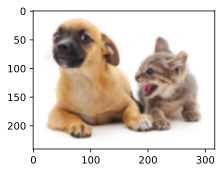

In [2]:
d2l.set_figsize()
img = d2l.plt.imread('../img/catdog.png')
d2l.plt.imshow(img)

In [3]:
#边界框
#@save
def box_corner_to_center(boxes):
    """"从(左上，右下)转换到(中间，宽度，高度)"""
    x1, y1, x2, y2 = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis= -1)
    return boxes

def box_center_to_corner(boxes):
    """从(中间，宽度，高度)转换到（左上，右下）"""
    cx, cy, w, h = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]
    x1 = cx - 0.5*w
    y1 = cy - 0.5*h
    x2 = cx + 0.5*w
    y2 = cy + 0.5*h
    boxes = torch.stack((x1, y1, x2, y2), axis= -1) 
    return boxes

In [11]:
#定义猫狗边界框
dog_bbox, cat_bbox = [30.0, 15.0, 180.0, 200.0], [190.0, 50.0, 300.0, 200.0] 
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [9]:
#在图像中画出边界框
#@save
def bbox_to_rect(bbox, color):
    #将边界框(左上x，左上y，右下x，右下y)格式转换为matplotlib格式
    #((左上x，左上y)，高，宽)
    return d2l.plt.Rectangle(xy = (bbox[0], bbox[1]), width= bbox[2]- bbox[0], height= bbox[3]- bbox[1],
        fill= False, edgecolor= color, linewidth= 2)

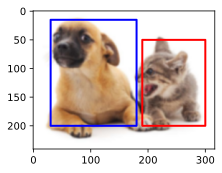

In [12]:
#绘制边界框
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))